* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [23]:
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as mlt

In [24]:
data = pd.read_csv("heart.csv")
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [27]:
print(data.shape)
data.isnull().sum()

(303, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

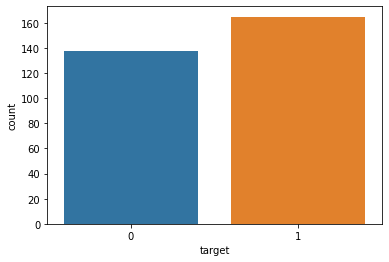

In [28]:
se.countplot(data["target"])
mlt.show()

In [29]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print(f"Percentage of Patients Haven't Heart Disease: {(countNoDisease / (len(data.target))*100)} %",)
print(f"Percentage of Patients Have Heart Disease: {(countHaveDisease / (len(data.target))*100)} %")

Percentage of Patients Haven't Heart Disease: 45.54455445544555 %
Percentage of Patients Have Heart Disease: 54.45544554455446 %


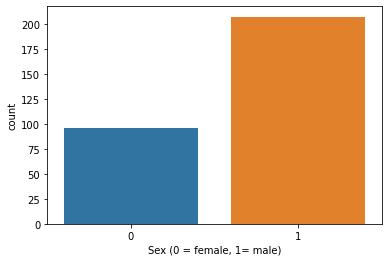

In [30]:
se.countplot(data.sex)
mlt.xlabel("Sex (0 = female, 1= male)")
mlt.show()

In [31]:
data.groupby("target").mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

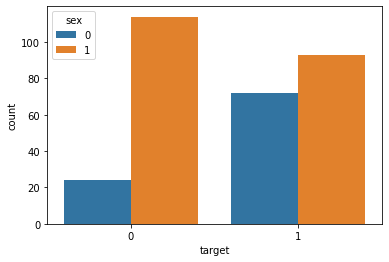

In [32]:
se.countplot(x="target",data=data,hue="sex")
mlt.show()

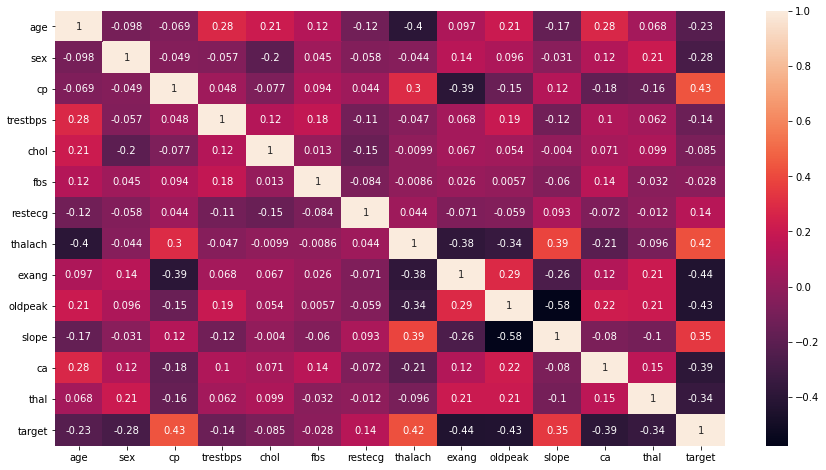

In [33]:
mlt.figure(figsize=(15,8))
se.heatmap(data.corr(),annot=True)
mlt.show()

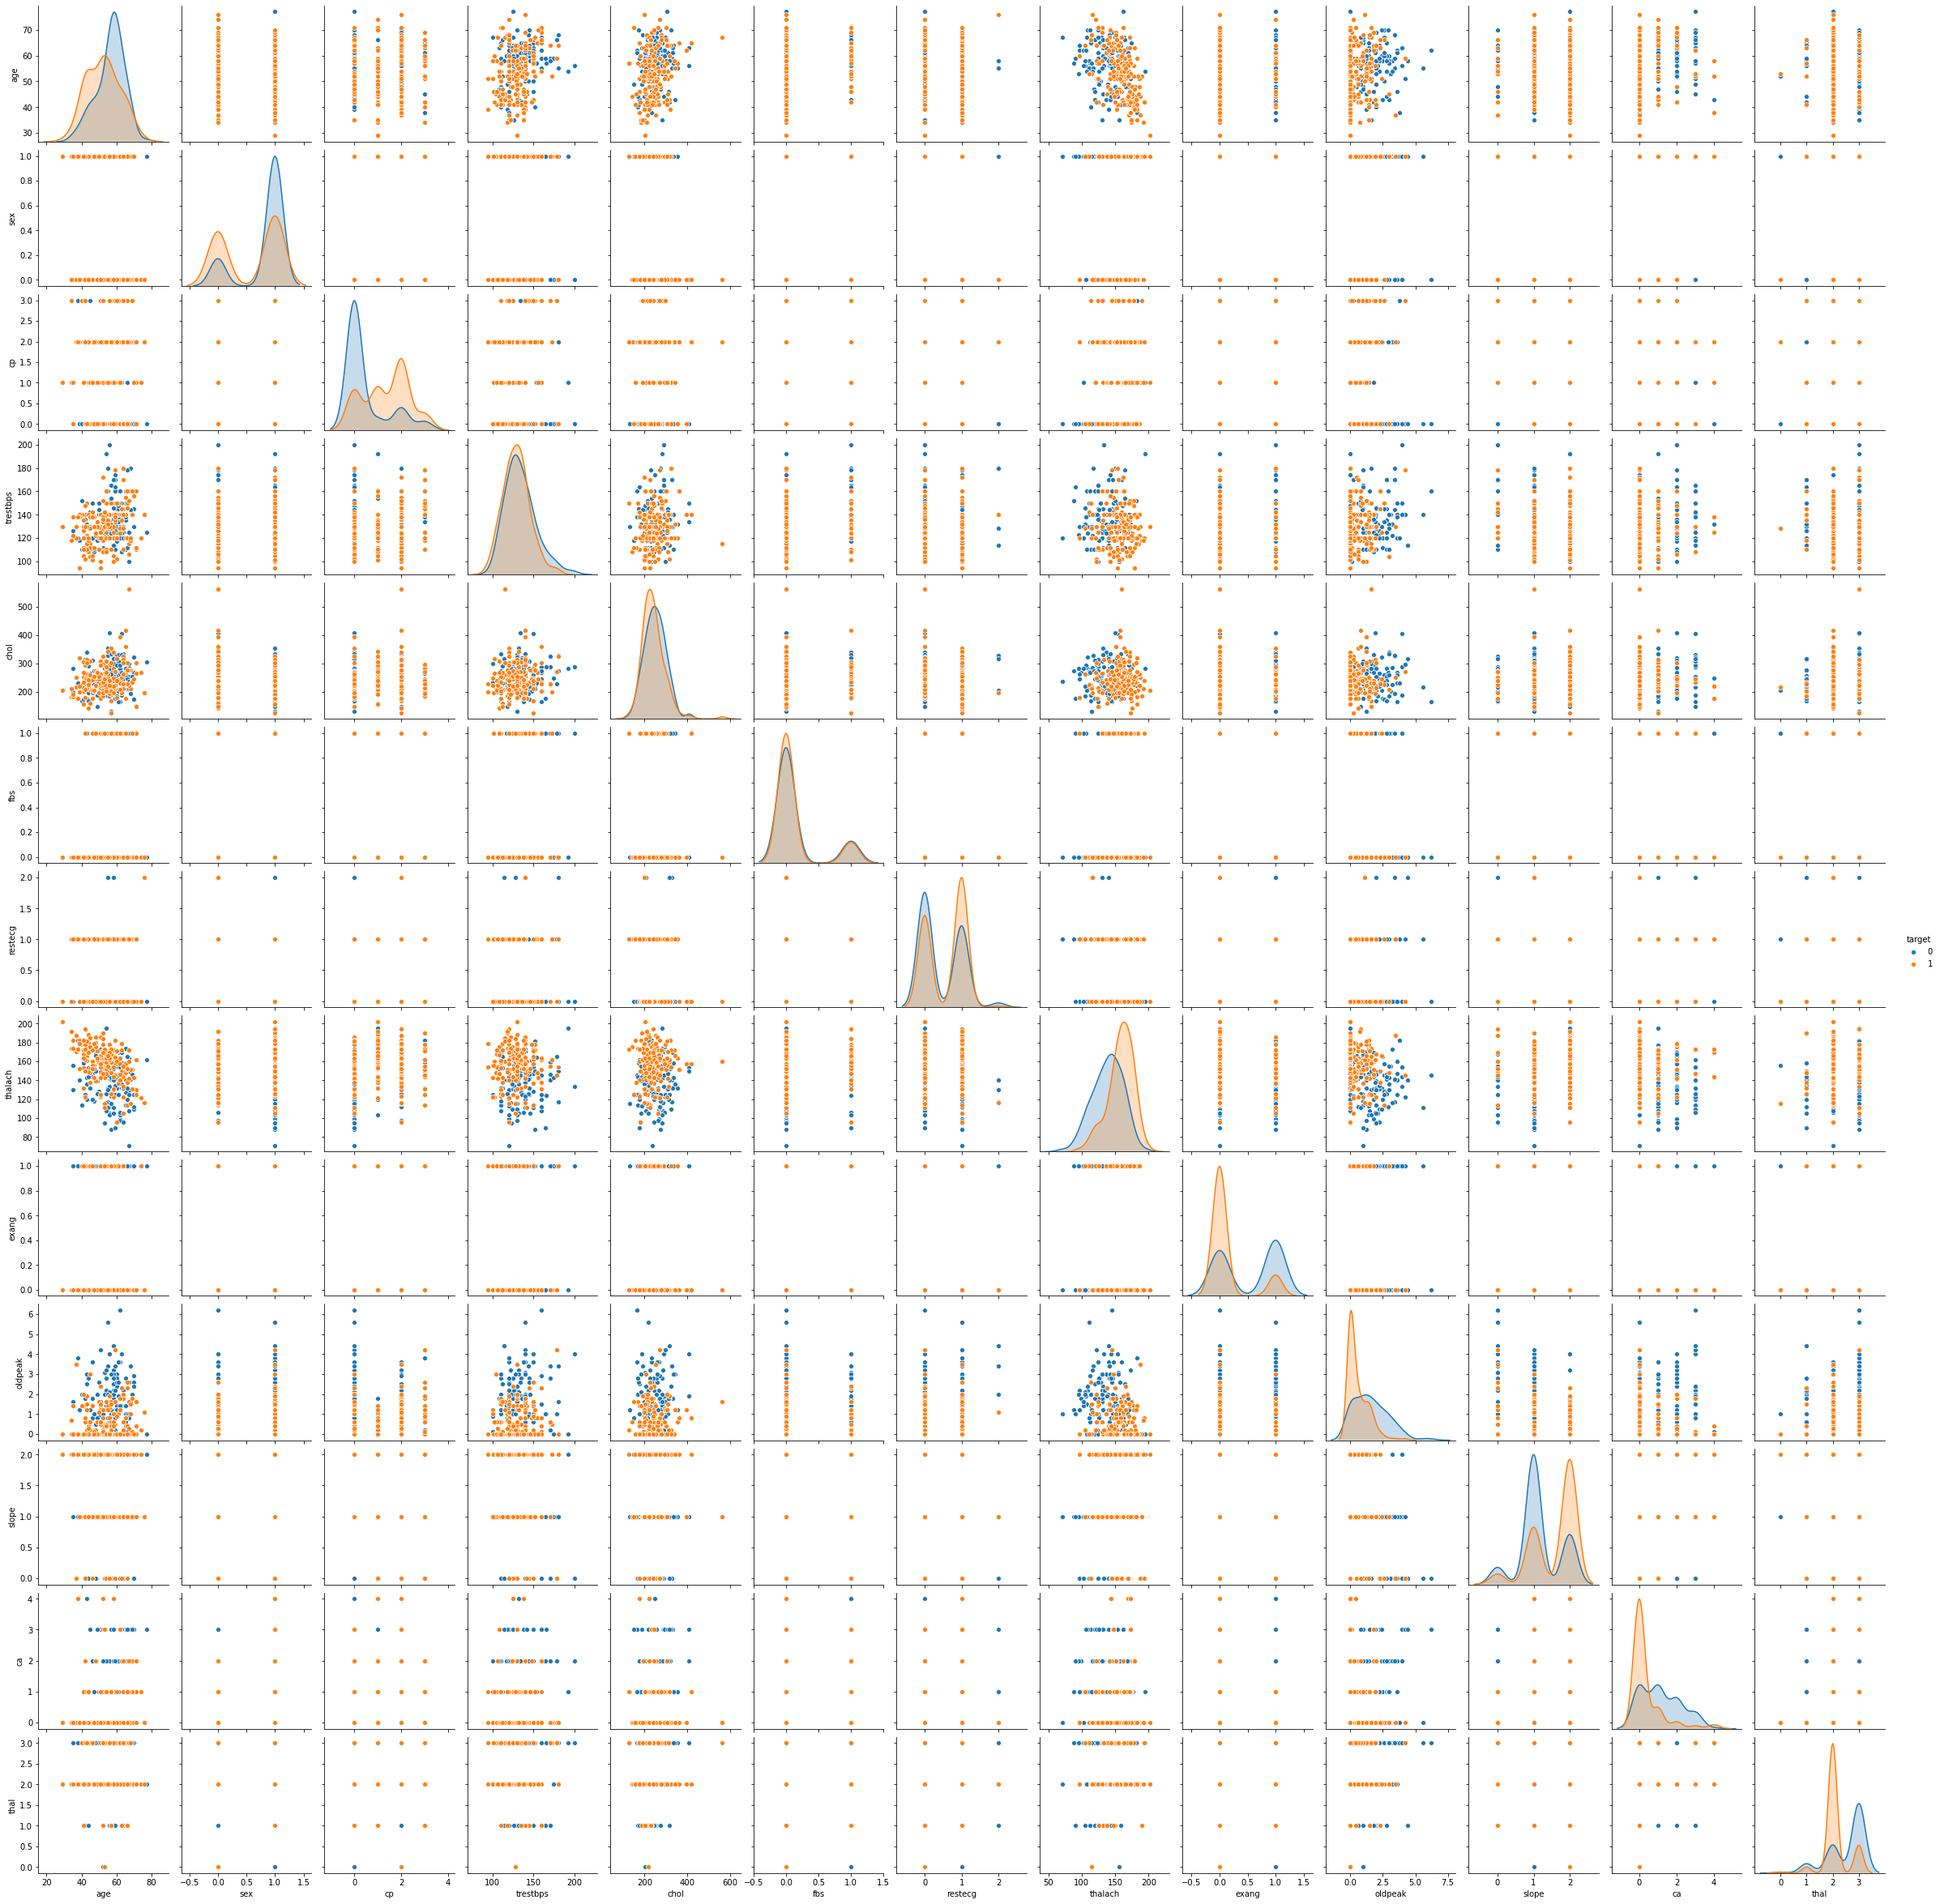

In [34]:
se.pairplot(data=data,hue="target")
mlt.show()

In [35]:
data.drop(["cp","ca","thal"],axis=1,inplace=True)
print(data.isnull().sum())
data

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64


age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     63    1       145   233    1        0      150      0      2.3      0   
1     37    1       130   250    0        1      187      0      3.5      0   
2     41    0       130   204    0        0      172      0      1.4      2   
3     56    1       120   236    0        1      178      0      0.8      2   
4     57    0       120   354    0        1      163      1      0.6      2   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...    ...   
298   57    0       140   241    0        1      123      1      0.2      1   
299   45    1       110   264    0        1      132      0      1.2      1   
300   68    1       144   193    1        1      141      0      3.4      1   
301   57    1       130   131    0        1      115      1      1.2      1   
302   57    0       130   236    0        0      174      0      0.0      1   

     target  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
298       0  
299       0  
300       0  
301       0  
302       0  

[303 rows x 11 columns]

In [36]:
x=data.drop("target",axis=1)
y=data["target"]

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=2)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

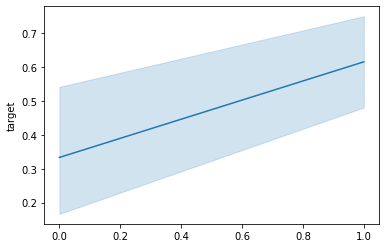

In [41]:
se.lineplot(y_predict,y_test)
mlt.show()

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[16 20]
 [ 8 32]]
0.631578947368421


#### Here the acceuracy score is only 63% while having neighbors = 1
#### Now let's try for different neighbors.

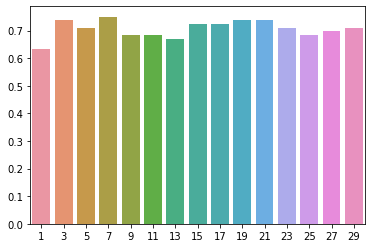

In [44]:
l=[]
l1=[]
for i in range(1,31):
    if i%2!=0:
        l1.append(i)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=2)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_predict = knn.predict(x_test)
        a=accuracy_score(y_test,y_predict)
        l.append(a)
se.barplot(l1,l)
mlt.show()